In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
from datetime import datetime

# Read in the data from the CSV file
pingDataVM1OnlyIP = pd.read_csv('pingVM1ResultsMTDOnlyIP.txt')
pingDataVM2OnlyIP = pd.read_csv('pingVM2ResultsMTDOnlyIP.txt')
pingDataVM1OnlyIP = pingDataVM1OnlyIP.fillna(-1)
pingDataVM2OnlyIP = pingDataVM2OnlyIP.fillna(-1)

print(pingDataVM1OnlyIP)
print(pingDataVM2OnlyIP)

        time  numberOfPacketsTrans  numberOfPacketsRec loss  pingResults
0   17:08:42                   1.0                 1.0   0%            0
1   17:08:44                   1.0                 1.0   0%            0
2   17:08:46                  -1.0                -1.0   -1            0
3   17:08:48                  -1.0                -1.0   -1            0
4   17:08:50                  -1.0                -1.0   -1            0
..       ...                   ...                 ...  ...          ...
56  17:16:38                   1.0                 1.0   0%            4
57  17:16:40                   1.0                 1.0   0%            4
58  17:16:42                   1.0                 1.0   0%            4
59  17:16:44                   1.0                 1.0   0%            4
60  17:16:46                   1.0                 1.0   0%            4

[61 rows x 5 columns]
        time  numberOfPacketsTrans  numberOfPacketsRec loss  pingResults
0   17:08:42                

In [44]:

def getSeconds(wholedf):
    pingVM1 = []
    flag = False
    time_diffs = []

    numOfInfections = wholedf.iloc[-1,-1]
    #print(numOfInfections)
    #print(numOfInfections)
    #print(wholedf)
    for infection in range(0,int(numOfInfections)):
        
        #print(infection)
        #print(type(wholedf["pingResults"][40]))
        df = wholedf.loc[wholedf['pingResults'] == int(infection)]
        df = df.reset_index(drop=True)
        for index, row in df.iterrows():
            #print("current row \n" + str(row))
    
            #print(index)
            #print(row["loss"])
            #print(df.iloc[index+1]["loss"])
            #print(row["time"])
            #print(pingDataVM1OnlyIP.iloc[index+1]["loss"])
            #try:
            
            if index == df.index[-1]:
               
                #print("here")
                dfHelp = wholedf.loc[wholedf['pingResults'] == (int(infection)+1)]
                
                dfHelp = dfHelp.reset_index(drop=True)
                #print(dfHelp)
                firstOfNext = dfHelp.iloc[0]
                
                
                #print("this is the firstOfNext:\n ", firstOfNext)
                #print("last")
                #print(row["time"])              
                
                pingVM1.append(datetime.strptime(firstOfNext["time"], '%H:%M:%S'))
                flag = False
                #print("\n\n")


            elif flag == False and df.iloc[index+1]["loss"] == -1:
                #print("this is the row of elif:\n ", df.iloc[index+1])

                #print(df.iloc[index+1]["loss"])
                #print(flag)
                #print(row)
                #print(f"first: {row.time}")
                pingVM1.append(datetime.strptime(df.iloc[index+1]["time"],'%H:%M:%S'))
                flag = True
        #if flag == True and df.iloc[index+1]["loss"] == "0%":
                    
                                 
            #except IndexError:
            #    print("finito")
            
        
        #print(df)
  
        # get the time value of the first row
        time_start = df.iloc[0]["time"]
        #print("timeStart:" + time_start)
        #print(df)
        
        # get the time value of the row before -1 values occur in loss column
        #time_end = df.iloc[-1]["time"]
        time_endRow = df.loc[df['loss'] == -1].iloc[0]
        time_end = time_endRow["time"]
        #print(time_end)
        # subtract the time values
        time_diff = pd.to_datetime(time_end) - pd.to_datetime(time_start)
        # add the time difference to the list
        time_diffs.append(time_diff.total_seconds())
    
        
        
    
    
    #print("time_diffs", time_diffs)
    #print(pingVM1)
    resultVM1 = [b - a for a, b in zip(pingVM1[::2], pingVM1[1::2])]
    resultSecondsVM1 = [x.seconds for x in resultVM1]
    return (resultSecondsVM1,time_diffs)
    
resultSecondsVM1 = getSeconds(pingDataVM1OnlyIP)
resultSecondsVM2 = getSeconds(pingDataVM2OnlyIP)

print(resultSecondsVM1)
print(resultSecondsVM2)








([5, 6, 6, 6], [4.0, 125.0, 124.0, 124.0])
([5, 6, 6, 6], [4.0, 125.0, 124.0, 124.0])


[10, 12, 12, 12]
[8.0, 250.0, 248.0, 248.0]
The mean duration the : 11.5


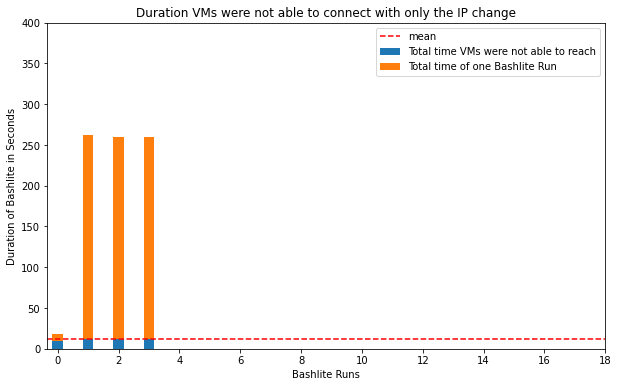

In [47]:
import matplotlib.pyplot as plt
import numpy as np


overallInfected = []
overallTime = []

for i in range(len(resultSecondsVM1[0])):
    overallInfected.append(resultSecondsVM1[0][i] + resultSecondsVM2[0][i])
    overallTime.append(resultSecondsVM1[1][i] + resultSecondsVM2[1][i])

print(overallInfected)
print(overallTime)

labels = []
for i in range(len(resultSecondsVM1[0])):
    labels.append(i)



width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(figsize=(10,6))


mean = sum(overallInfected)/len(overallInfected)
    
print(f"The mean duration the : {mean}")

ax.bar(labels,overallInfected, width,label="Total time VMs were not able to reach")
ax.bar(labels,overallTime, width, bottom=overallInfected,
       label='Total time of one Bashlite Run')

ax.axhline(mean, color='r', linestyle='--', label='mean')
plt.ylim(0, 400)
plt.xticks(range(0, 20, 2))
plt.title('Duration VMs were not able to connect with only the IP change')
plt.xlabel('Bashlite Runs')
plt.ylabel('Duration of Bashlite in Seconds')

ax.legend()

plt.show()

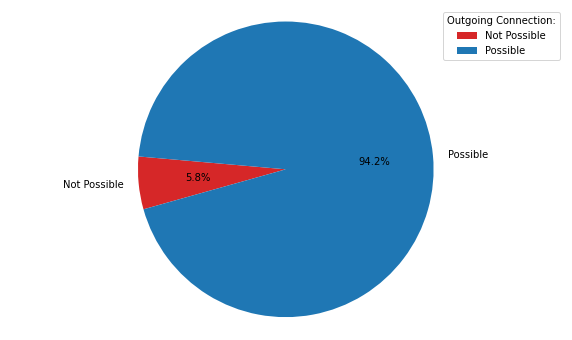

In [51]:
labels = "Not Possible", "Possible"
sumInfected = sum(overallInfected)
sumTime = sum(overallTime)

sizes = [sumInfected,sumTime]
colors = ["#d62728", "#1f77b4"]
width = 0.35       # the width of the bars: can also be len(x) sequence
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=175,colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title = "Outgoing Connection:")

plt.show()

In [ ]:

def getSeconds(df):
    pingVM1 = []
    flag = False
    for index, row in df.iterrows():
        #print(row["time"])
        #print(pingDataVM1OnlyIP.iloc[index+1]["loss"])
        try:
            if flag == False and df.iloc[index+1]["loss"] == -1:
                #print(flag)
                #print(row)
                pingVM1.append(row["time"])
                flag = True
            if flag == True and df.iloc[index+1]["loss"] == "0%":
                pingVM1.append(df.iloc[index]["time"])
                flag = False                      
        except IndexError:
            print("finito")
            
    print(pingVM1)

    lastTimeOfBashRun = pingVM1[1::2]
    print(lastTimeOfBashRun)
    print(len(lastTimeOfBashRun))
    
    df["BashliteRun"] = None
    
    count = 0
    add = True
    for index, row in df.iterrows():
        if count < len(lastTimeOfBashRun):
            print(count)
            print(lastTimeOfBashRun[count])
            if row["time"] != lastTimeOfBashRun[count]:
                df["BashliteRun"] = count
            else:
                count += 1

    
    #resultVM1 = [b - a for a, b in zip(pingVM1[::2], pingVM1[1::2])]
    #resultSecondsVM1 = [x.seconds for x in resultVM1]
    #return resultSecondsVM1
    
resultSecondsVM1 = getSeconds(pingDataVM1OnlyIP)

print(resultSecondsVM1)






